In [124]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import math
%matplotlib inline


In [173]:
# SETTING UP ARRAYS FOR DISTANCE PARAMETERS AND EINSTIEN RADIUS MEASUREMENTS

Array = np.loadtxt('Lens 2 Data.txt', skiprows=1, delimiter=',')
Trial1 = Array[0]
Trial2 = Array[1]
Trial3 = Array[2]
Trial4 = Array[3]
Trial5 = Array[4]

DL = []
DL.append(Trial1[1])
DL.append(Trial2[1])
DL.append(Trial3[1])
DL.append(Trial4[1])
DL.append(Trial5[1])

DLS = []
DLS.append(Trial1[2])
DLS.append(Trial2[2])
DLS.append(Trial3[2])
DLS.append(Trial4[2])
DLS.append(Trial5[2])

ER = []
ER.append(Trial1[3]/2)     # divide by 2 because in the text document we have the diameter measurements 
ER.append(Trial2[3]/2)
ER.append(Trial3[3]/2)
ER.append(Trial4[3]/2)
ER.append(Trial5[3]/2)

print(ER)

print(Array)

[0.01529, 0.016185, 0.016795, 0.14865, 1.1735]
[[1.      0.477   0.173   0.03058]
 [2.      0.42    0.23    0.03237]
 [3.      0.36    0.29    0.03359]
 [4.      0.27    0.38    0.2973 ]
 [5.      0.2     0.45    2.347  ]]


In [166]:
# DEFINING ERROR FUCNTIONS TO CALCULATE THE UNCERTAINTY IN THE EINSTIEN ANGLE 

DLS_error = DL_error = DS_error = 0.005
ER_error = 0.000005

def delF_delER(ER_error,DS,ER):
    return 1/(1+((ER/DS)**2))*ER_error

def delF_delDS(DS_error,DS,ER):
    return (1/(1+(ER/DS)**2))*1/(DS**2)*DS_error

In [167]:
# SOLVING FOR THE EINSTIEN ANGLE AND THE UNCERTAINTIES

def angle_func(ER):
    return math.atan(ER/0.65)

EA = []
for i in range(5):
    EA.append(angle_func(ER[i]))
    
EA_error = []
for i in range (5):
    EA_error.append(delF_delER(ER_error,0.65,ER[i])+delF_delDS(DS_error,0.65,ER[i]))
    
print(EA)
print(EA_error)

[0.02351873964788298, 0.024894855830526356, 0.02583271369700818, 0.22482604276248655, 1.0649648817831436]
[0.011832772037961183, 0.01183198357848872, 0.011831420561523276, 0.011250895748360865, 0.002779565595675378]


In [168]:
# DEFINING FUNCTIONS FOR MASS UNCERTAINTY CALCULATIONS 

def delM_delEA(EA,DS,DL,DLS,G,c):
    return 2*EA*(c**2/(4*G))*(DS*DL/DLS)

def delM_delDS(EA,DS,DL,DLS,G,c):
    return (EA**2)*(c**2/(4*G))*(DL/DLS)

def delM_delDL(EA,DS,DL,DLS,G,c):   
    return (EA**2)*(c**2/(4*G))*(DS/DLS)

def delM_delDLS(EA,DS,DL,DLS,G,c):  
    return (EA**2)*(c**2/(4*G))*(DS*DL/(DLS**2))

In [169]:
# CALCULATING THE MASS AND UNCERTAINTIES

c = 3e8
G = 6.67e-11

def mass_func(c, G, EA, DL, DLS):
    return (EA**2)*(c**2)*0.65*DL/(4*G*DLS)

mass = []
for i in range(5):
    mass.append(mass_func(c, G, EA[i], DL[i], DLS[i]))
    
EA_differential = []
DS_differential = []
DL_differential = []
DLS_differential = []
mass_error = []

for i in range(5):
    EA_differential.append(delM_delEA(EA[i],0.65,DL[i],DLS[i],G,c))
    DS_differential.append(delM_delDS(EA[i],0.65,DL[i],DLS[i],G,c))
    DL_differential.append(delM_delDL(EA[i],0.65,DL[i],DLS[i],G,c))
    DLS_differential.append(delM_delDLS(EA[i],0.65,DL[i],DLS[i],G,c))
    mass_error.append(EA_differential[i]*EA_error[i]+DS_error*(DS_differential[i]+DL_differential[i]+DLS_differential[i]))
    
print(mass)
print(mass_error)

[3.344031854315026e+23, 2.4814796976131847e+23, 1.8164130152769183e+23, 7.874870871335339e+24, 1.1052438225343335e+26]
[3.5223297521158675e+23, 2.461361610368503e+23, 1.734357454192773e+23, 1.0981827422706487e+24, 5.418284584917099e+24]


In [170]:
# DEFINING ERROR FUNCTIONS FOR DISTANCE PARAMETER

def delD_delDLS(DLS,DL,DS):
    return 1/(DL*DS)

def delD_delDL(DLS,DL,DS):
    return DLS*((DL**2)*DS)

def delD_delDS(DLS,DL,DS):
    return DLS*((DS**2)*DL)

In [171]:
# DISTANCE PARAMETER AND UNCERTAINTY CALCULATIONS 
# note: D = distance paramter: DLS/(DL*DS)

D = []
for i in range(5):
    D.append(DLS[i]/(0.65*DL[i]))
    
D_error = []
for i in range(5):
    D_error.append(DS_error*(delD_delDLS(DLS[i],DL[i],0.65)+delD_delDL(DLS[i],DL[i],0.65)+delD_delDS(DLS[i],DL[i],0.65)))
    
print(D)
print(D_error)

[0.5579745202386711, 0.8424908424908425, 1.2393162393162394, 2.165242165242165, 3.4615384615384617]
[0.016428685013520846, 0.018650944815018316, 0.02171021436752137, 0.02879680249002849, 0.03871016346153846]


offset: 3.0226870295819293e+24 +- 5.216750794613766e+24
offset: -2.7750541051507904e+24 +- 5.680983714866228e+24


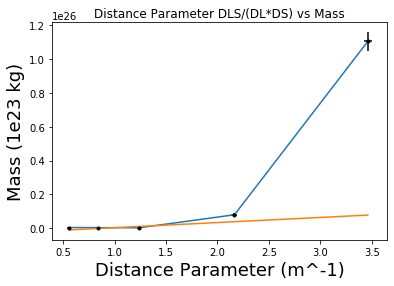

<Figure size 432x288 with 0 Axes>

In [172]:
plt.plot(D, mass)
plt.errorbar(D, mass, mass_error, D_error, fmt='k.')      

def func(x,m,b):                                 
    return m*x+b                                
 
initialguess = [1e24,-1e23]                     
                                        
fit, covariance = optimize.curve_fit(            
        func,                                    
        D,                                  
        mass,
        initialguess,
        mass_error)   

print("offset:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("offset:",fit[1],"+-",np.sqrt(covariance[1][1])) 

Dfit=np.linspace(min(D), max(D), 100) 
func_plot=func(Dfit,*fit)    

plt.plot(Dfit, func_plot) 

plt.title('Distance Parameter DLS/(DL*DS) vs Mass')
plt.xlabel('Distance Parameter (m^-1)',fontsize = 18)
plt.ylabel('Mass (1e23 kg)',fontsize = 18)

plt.show()
plt.savefig("./",dpi=300)         
plt.clf()